# Assignment — Introduction and Power law

In this notebook, we will learn bacics of networkx and investigate some properties of scale-free graphs.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
from zlib import adler32

In [2]:
assert nx.__version__ >= '2.5'

In case of an exception, install networkx using `pip` as follows:
```
pip uninstall networkx
pip install networkx==2.5
```

### Task 1. Reading a graph from a file (0 point)

In [3]:
url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_adjlist.txt'
open('the_lord_of_the_rings_adjlist.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/the_lord_of_the_rings_edgelist.txt'
open('the_lord_of_the_rings_edgelist.txt', 'wb').write(requests.get(url).content);


A common representation of a graph is an adjacency matrix, but many real-world graphs are sparse (many zeros in an adjacency matrix), so in most cases data is stored in cheap sparse formats
1. edge list
2. adjacency list

Edge list is a list of pairs of nodes — a target and destination of edges. Here is an edge list of an interaction network of films "The Lord of the Rings" (2001-2003).

In [4]:
with open('the_lord_of_the_rings_edgelist.txt') as f:
    print(f.read()[:197])

ARAGORN, ELROND
ARAGORN, EOMER
ARAGORN, EOWYN
ARAGORN, GIMLI
ARAGORN, LEGOLAS
ARAGORN, MERRY
ARAGORN, PIPPIN
ARAGORN, THEODEN
ARAGORN, GANDALF
ARAGORN, KING OF THE DEAD
ARWEN, ELROND
BILBO, ELROND



Adjacency list is a list of lists of nodes where the first node is a root and others are leafs

In [5]:
with open('the_lord_of_the_rings_adjlist.txt') as f:
    print(f.read()[:190])

FRODO, SMEAGOL, GALADRIEL, GANDALF, GORBAG
SMEAGOL, GOLLUM, SAM
GALADRIEL, GANDALF, SAM
GANDALF, GIMLI, LEGOLAS, MERRY, PIPPIN, SAM, SOLDIER, THEODEN, TREEBEARD, IORLAS
GORBAG, SAM, SHAGRAT



In most cases we can create a graph from a file using following functions in networkx:

* `nx.read_adjlist`
* `nx.read_edgelist`
* `nx.read_weighted_edgelist`

In the further task, read graphs `the_lord_of_the_rings_edgelist.txt`, `the_lord_of_the_rings_adjlist.txt` and combine them into a single graph such that the same nodes are merged in a single node preserving all adjacent edges.

*Hint: use `graph.add_edges_from`*

In [6]:
def read_and_merge_graphs(edgelist_path, adjlist_path):
    ### BEGIN SOLUTION
    G1 = nx.read_edgelist(edgelist_path, delimiter=', ')
    G2 = nx.read_adjlist(adjlist_path, delimiter=', ')
    G1.add_edges_from(G2.edges)
    return G1
    ### END SOLUTION

In [7]:
G = read_and_merge_graphs("the_lord_of_the_rings_edgelist.txt", 
                          "the_lord_of_the_rings_adjlist.txt")
assert set(G.neighbors('SAM')) == {
    'BILBO',
    'ELROND',
    'FRODO',
    'GALADRIEL',
    'GANDALF',
    'GOLLUM',
    'GORBAG',
    'SHAGRAT',
    'SMEAGOL'}
assert nx.number_of_nodes(G) == 35
assert nx.number_of_edges(G) == 98

### Task 2. Bacis statistics (1 point)

Networkx provides a simple interface for getting basic graph statistics (look at the documentation to recall definitions):
* `nx.radius`
* `nx.diameter`
* `nx.average_shortest_path_length`
* `nx.average_clustering`

For example, here are statistics of a path graph with 3 nodes:

Radius:  1
Diameter:  2
Average shortest path length:  1.3333333333333333
Average clustering coefficient:  0.0


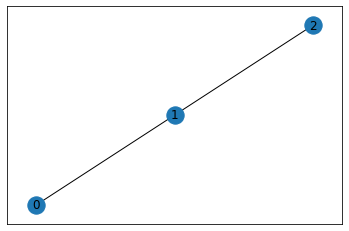

In [8]:
G = nx.path_graph(3)
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)

Your task is to create graphs by given statistics. We can create a graph using simple networkx interfaces. For example, we can create a graph by passing an edgelist.

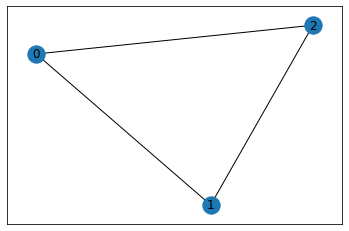

In [9]:
G = nx.Graph([[0, 1], [1, 2], [2, 0]])
nx.draw_networkx(G)

Or create an empty graph and then add edges one by one.



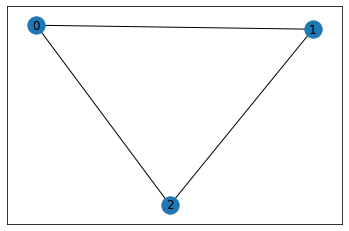

In [10]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 0)
nx.draw_networkx(G)

Write a function `graph1` that returns a graph with a radius 3 and diameter 3.

In [11]:
def graph1():
    return nx.Graph([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 0]])

In [12]:
G = graph1()
assert nx.radius(G) == nx.diameter(G) == 3

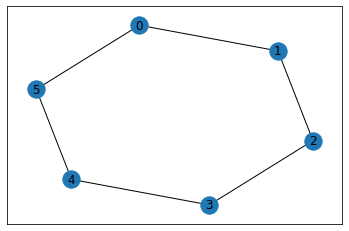

In [13]:
nx.draw_networkx(G)

Write a function `graph2` that returns a graph with a diameter of at least 5 average shortest path lengths.

In [14]:
def graph2():
    return nx.Graph([[0, 0]])

In [15]:
G = graph2()
assert nx.diameter(G) >= 5 * nx.average_shortest_path_length(G)

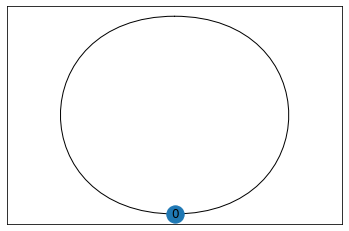

In [16]:
nx.draw_networkx(G)

Write a function `graph3` that returns a graph with an average clustering coefficient between 0.1 and 0.11.

In [17]:
def graph3():
  flag = True
  start = 3
  G = nx.complete_graph(start)
  i = start
  while flag:
    i += 1
    G.add_node(i)
    G.add_edge(i - 2, i)
    if 0.1 <= nx.average_clustering(G) <= 0.11:
      flag = False
  return G

In [18]:
G = graph3()
assert 0.1 <= nx.average_clustering(G) <= 0.11

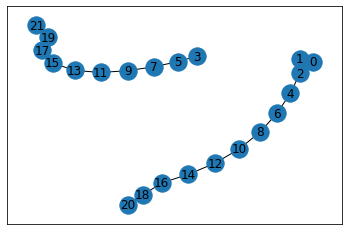

In [19]:
nx.draw_networkx(G)

### Task 3. Graph layout (1 points)

A graph layout is a dictionary with a location of every node: keys are nodes and values are x, y positions. By default in `nx.draw_networkx`, it is the spring layout — a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects.

In [20]:
G = nx.barabasi_albert_graph(10, 2)
layout = nx.spring_layout(G)
layout

{0: array([-0.14621691, -0.06620429]),
 1: array([0.30392718, 0.22328395]),
 2: array([-0.34353365, -0.82566263]),
 3: array([ 0.03890973, -0.34935747]),
 4: array([-0.33069199,  0.36418544]),
 5: array([0.64194925, 0.19956081]),
 6: array([-0.80535156,  0.12632464]),
 7: array([1.        , 0.46886827]),
 8: array([-0.44748956,  0.70119133]),
 9: array([ 0.08849752, -0.84219004])}

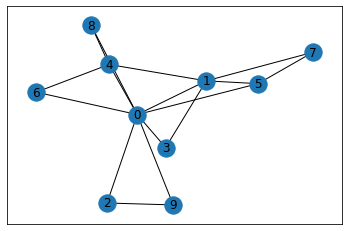

In [21]:
nx.draw_networkx(G, pos=layout)

The Kamada Kawai layout is based on path-length cost-function. Sometimes, it is quite similar to the spring layout, however a significant difference is that the spring layout is random and the Kamada Kawai is deterministic.

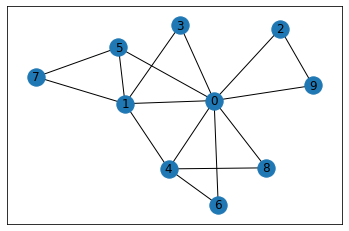

In [22]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)

Circular layout allows to draw a graph where nodes are in a circle.

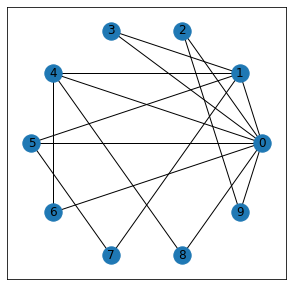

In [23]:
layout = nx.circular_layout(G)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=layout)

Bipartite layout allows to draw bipartite graph.

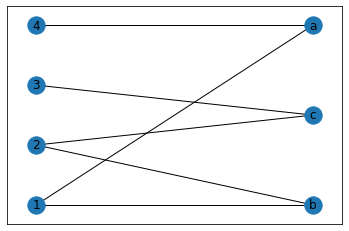

In [24]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
layout = nx.bipartite_layout(B, [1, 2, 3, 4])
nx.draw_networkx(B, pos=layout)

There are other layouts in networkx, also there are some useful parameters that you can find in documentation. Next, let us visualize a coappearance network of characters in The Matrix — a 1999 American science fiction action film written and directed by the Wachowskis. The dataset is taken from https://moviegalaxies.com/.

In [25]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/the_matrix_graph.gexf'
open('the_matrix_graph.gexf', 'wb').write(requests.get(url).content);

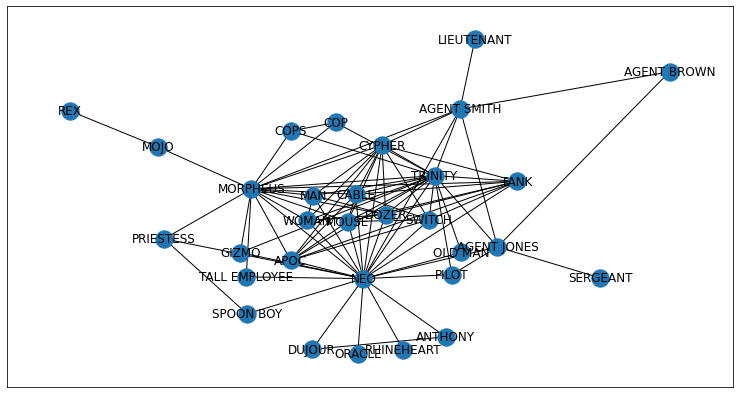

In [26]:
def get_matrix_graph():
    G = nx.read_gexf('the_matrix_graph.gexf')
    mapping = {}
    for node in G.nodes:
        mapping[node] = G.nodes[node]['label']
    G = nx.relabel_nodes(G, mapping)
    return G
matrixG = get_matrix_graph()
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx(matrixG, pos=layout)

Your task is to draw the matrix graph using the kamada kawai layout with nonlinear modification to obtain a denser layout away from the NEO node. Let us define a proximity coefficient using Gaussian kernel

$$\text{coef}(i) = \exp\left(-\frac{\text{distance}^2}{2\sigma^2}\right)$$

where a _distance_ is the Euclidean distance from the node $i$ to the NEO node, $\sigma$ is the constant. Then the nodes should be moved towards the NEO node such that

$$\text{distance} = \text{coef}(i) \times \text{distance}$$

The simplest way to do it is to center the layout so that the NEO node is in x=0 y=0 and then to multiply all node positions by the proximity coefficient.

Write a function `dense_neo_layout` that takes a layout, sigma and returns a new (dense) layout.

_Hint: use `np.linalg.norm` to calculate Euclidean norm._

In [27]:
def dense_neo_layout(layout, sigma):
    zero_point = np.array(layout['NEO'])
    for key, value in layout.items():
      layout[key] -= zero_point
      distance = np.linalg.norm(layout[key])
      coef = np.exp((-1 *distance ** 2) / (2 * sigma ** 2))
      layout[key] *= coef
    return layout

In [28]:
layout = nx.kamada_kawai_layout(matrixG)
layout = dense_neo_layout(layout, sigma=1.5)
assert type(layout) == dict
assert np.all(layout['NEO'] == [0, 0])
assert np.all(layout['REX'].round(2) == [-0.67,  0.58])
assert adler32(str(layout['AGENT BROWN'].round(2)[0]).encode()) == 32309448

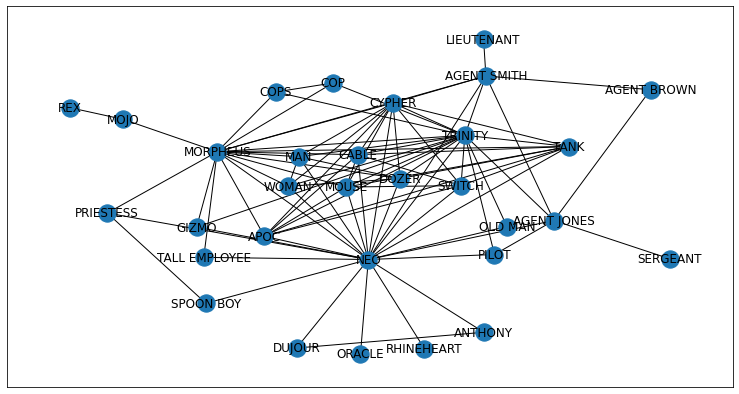

In [29]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(matrixG, layout)

### Task 4. Nodes visualization (0 point)

We can set a node size using `draw_networkx` with a parameter `node_size`. It should be a list of values ordered by `G.nodes`. For example, consider a simple path graph.

In [30]:
G = nx.path_graph(3)
G.nodes

NodeView((0, 1, 2))

Let us set a size 200 for the node 0, 300 for 1, 400 for 2.

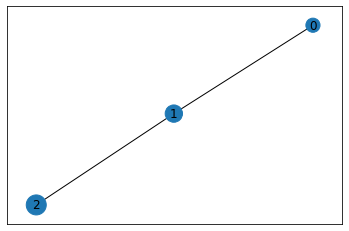

In [31]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, node_size=[200, 300, 400])

To color nodes, we can use `node_color`. It should be a list of colors:
* a tuple of float RGB 0-1 values: (red, green, blue)
* a tuple of float RGBA 0-1 values: (red, green, blue, alpha)
* a string — color name

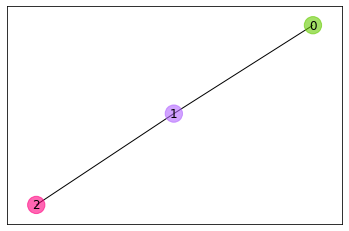

In [32]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[(0.4, 0.8, 0, 0.6), (0.7, 0.4, 1, 0.6), (1, 0, 0.5, 0.6)])

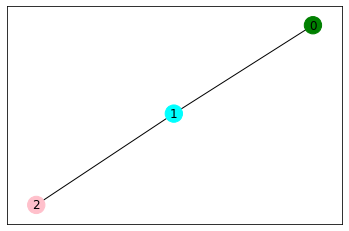

In [33]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=['green', 'cyan', 'pink'])

Also we can use a colors from matplotlib colormaps. Discrete:

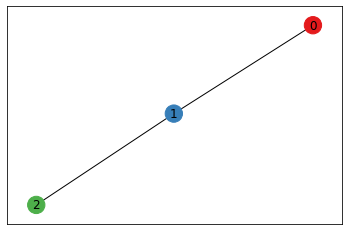

In [34]:
colors = plt.cm.Set1.colors
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[colors[0], colors[1], colors[2]])

Or continuous:

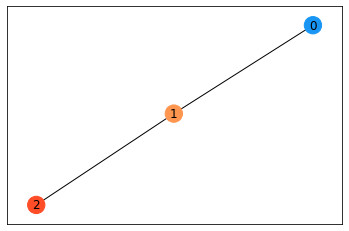

In [35]:
rainbow = plt.cm.rainbow
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[rainbow(0.2), rainbow(0.8), rainbow(0.9)])

Another option of coloring nodes is to pass a list of single values by the `node_color` and colormap by the `cmap` parameter. In this case, the lowest value will assigned to the first color in colormap and vise versa.

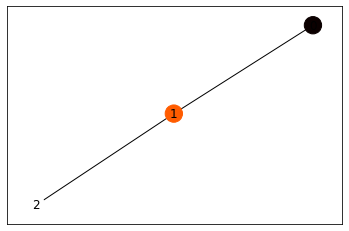

In [36]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3])

We can forcibly set a color range using `vmin` and `vmax`.

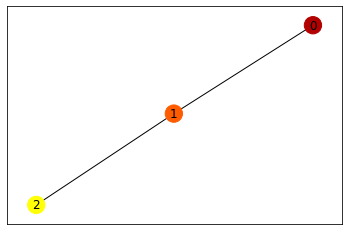

In [37]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3],
    vmin=0, vmax=4)

We can border nodes using `edgecolors` and `linewidths` parameters.

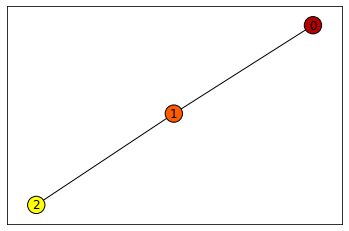

In [38]:
nx.draw_networkx(
    G=G, 
    pos=layout,
    cmap = plt.cm.hot, 
    node_color=[1, 2, 3],
    vmin=0, vmax=4, 
    edgecolors='black', 
    linewidths=1)

Your task is to adjust a size and color of nodes in the matrix graph, size and color are taken from a node degree and node attribute `G.nodes[node]`.

In [39]:
matrixG.nodes['NEO']

{'Betweenness Centrality': 197.97857142857137,
 'Closeness Centrality': 1.2666666666666666,
 'Component ID': 0,
 'Degree': 23,
 'Eccentricity': 3.0,
 'Modularity Class': 2,
 'label': 'NEO',
 'movie_id': 543,
 'viz': {'color': {'a': 1.0, 'b': 190, 'g': 202, 'r': 95},
  'position': {'x': -22.198978, 'y': -24.325882, 'z': 0.0},
  'size': 20.0}}

Write a function `drawing_nodes_params` that takes a graph and returns a dictionary with parameters for `nx.draw_networkx` of the form `{'G': graph, 'node_color': color, ...}`. Parameters should contain a graph, kamada kawai layout, node colors from `viz.color` attribute. The colors should be converted from RGB range 0-255 to RGB range 0-1. The node size is a node degree `G.degree[node]` multiplied by 100.

In [40]:
def drawing_nodes_params(graph):
    ### BEGIN SOLUTION
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    params['node_color'] = []
    params['node_size'] = []
    for node in graph.nodes:
        color = graph.nodes[node]['viz']['color']
        rgb = np.array([color['r'], color['g'], color['b']]) / 255
        params['node_color'].append(rgb)
        params['node_size'].append(graph.degree[node] * 100)
    return params
    ### END SOLUTION

In [41]:
matrixG = get_matrix_graph()
params = drawing_nodes_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 200
assert params['node_size'][1] == 600
assert nx.to_numpy_array(params['G']).sum() == 326.0

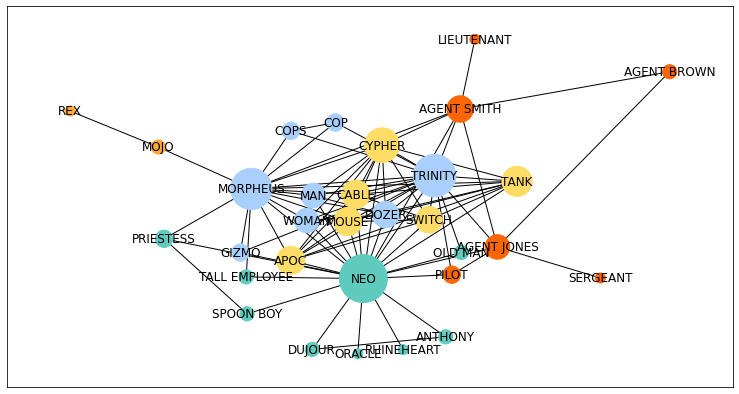

In [42]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

Sometimes, it will be useful to draw nodes in nonlinear scale. If we want to make node sizes more comparable, we can use polynomial or exponential scale. On the other hand, we can use logarithmic scale to make sizes more similar.

Write a function `drawing_nodes_polyparams` that returns the same dictionary as the `drawing_nodes_params` function, but the node size is a sum of node degree in a power 3 and 10.

$$\text{size} = \text{degree}^3 + 10$$

In [43]:
def drawing_nodes_polyparams(graph):
    ### BEGIN SOLUTION
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    params['node_color'] = []
    params['node_size'] = []
    for node in graph.nodes:
        color = graph.nodes[node]['viz']['color']
        rgb = np.array([color['r'], color['g'], color['b']]) / 255
        params['node_color'].append(rgb)
        params['node_size'].append(graph.degree[node]**3 + 10)
    return params
    ### END SOLUTION

In [44]:
matrixG = get_matrix_graph()
params = drawing_nodes_polyparams(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 18
assert params['node_size'][1] == 226
assert nx.to_numpy_array(params['G']).sum() == 326.0

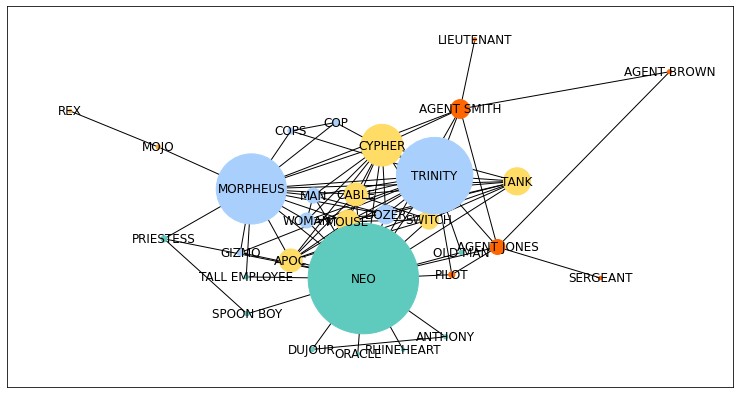

In [45]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

### Task 5. Edges visualization, weighted graphs (0 point)

We can set an edge width using `draw_networkx` with a parameter `width`. It should be a list of values sorted by G.edges. For example, consider a simple path graph.

In [46]:
G = nx.path_graph(4)
G.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

Let us set a width 1 for the edge 0-1, 5 for 1-2, 10 for 2-3.

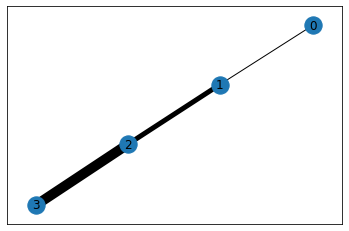

In [47]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, width=[1, 5, 10])

If we create a graph by a weighted ajacency matrix, weights will be stored in an edge attribute `weight`.

In [48]:
W = np.array([[0, 1, 0, 0], 
              [1, 0, 5, 0], 
              [0, 5, 0, 10], 
              [0, 0, 10, 0]])
G = nx.from_numpy_array(W)

In this case, we can get a value using `G.edges[edge]` view

In [49]:
G.edges[(0, 1)]

{'weight': 1}

Or we can get all values using `nx.get_edge_attributes`

In [50]:
nx.get_edge_attributes(G, 'weight')

{(0, 1): 1, (1, 2): 5, (2, 3): 10}

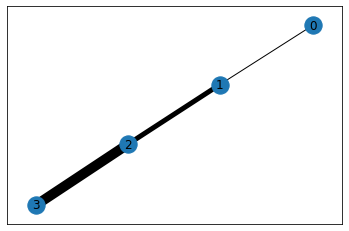

In [51]:
weights = list(nx.get_edge_attributes(G, 'weight').values())
nx.draw_networkx(G, pos=layout, width=weights)

If we want to apply specific color or style to some edges, it is possible by `edge_color` and `style` parameters. For example, we can draw an edge with a weight 10 as a red dotted line.

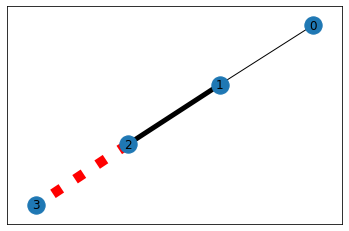

In [52]:
nx.draw_networkx(
    G, pos=layout, 
    width=[1, 5, 10], 
    edge_color=['black', 'black', 'red'], 
    style=['solid', 'solid', 'dotted'])

Your task is to draw the matrix graph where an edge width is 0 if a weight is 1, otherwise it is a weight value itself. An edge color is `red` if weight is at least 5 and `black` otherwise.

In [53]:
def drawing_edges_params(graph):
    ### BEGIN SOLUTION
    params = {}
    params['G'] = graph
    params['pos'] = nx.kamada_kawai_layout(graph)
    weights = []
    colors = []
    for n1, n2, weight in graph.edges(data='weight'):
        if weight == 1:
            weights.append(0)
        else:
            weights.append(weight)
        if weight >= 5:
            colors.append('red')
        else:
            colors.append('black')
    params['edge_color'] = colors
    params['width'] = weights
    return params
    ### END SOLUTION

In [54]:
matrixG = get_matrix_graph()
params = drawing_edges_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'edge_color', 'width']
assert len(set(params.keys()).intersection(keys)) == 4
assert nx.to_numpy_array(params['G']).sum() == 326.0
params['width'][0] == 2.0
assert np.array(params['width']) @ params['width'] == 508
assert adler32(str(params['edge_color']).encode()) == 646700613

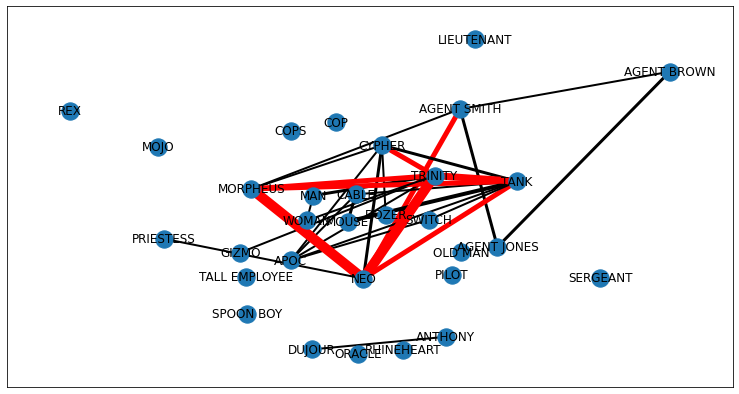

In [55]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params)

### Task 6. Labels visualization (1 point)

In this task, we will modify some label parameters: font size, position, visibility. In networkx, we cannot pass a list of font sizes to `draw_networkx`, so we will use drawing by layers using other methods:
* `draw_networkx_nodes` — draw the nodes only
* `draw_networkx_edges` — draw the edges only
* `draw_networkx_labels` — draw the node labels only
* `nx.draw_networkx_edge_labels` — draw the edge labels only

Also we can separately adjust an `alpha` value for nodes, edges, labels. Here is a simple example, let us draw a path graph with 4 nodes where the node 0 is labeled as "a", 3 is "b", the edge 1-2 is labeled as "edge", and edges are transparent with `alpha=0.2`.

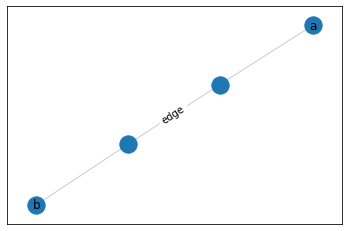

In [57]:
G = nx.path_graph(4)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout, alpha=0.2)
nx.draw_networkx_labels(G, pos=layout, labels={0: 'a', 3: 'b'})
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels={(1, 2): 'edge'})
plt.show()

If we want to adjust a font size, it is possible by repeated drawing labels with different `font_size` values. For example:

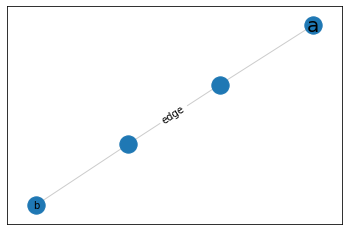

In [58]:
G = nx.path_graph(4)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout, alpha=0.2)
nx.draw_networkx_labels(G, pos=layout, labels={3: 'b'}, font_size=10)
nx.draw_networkx_labels(G, pos=layout, labels={0: 'a'}, font_size=20)
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels={(1, 2): 'edge'})
plt.show()

Your task is to draw the matrix graph with settings: 
* labels are invisible if a node degree less than 6
* a font size is a node degree
* all labels are slided down so that $y = y - 0.025 \sqrt{\text{degree}}$

Write a function `labels_list_parameters` that takes a graph, layout and returns a list of parameters for repited drawing labels using `nx.draw_networkx_labels`. Each element of the list is a dictionary that can be passed to `nx.draw_networkx_labels`. The first dictionary is for the node degree 6, the second is for 7 and so on.

In [63]:
def labels_list_parameters(graph, layout):
    list_params = []
    pairs = []
    for name, degree in graph.degree:
      pairs.append([name, degree])
      layout[name] -= [0, 0.025 * np.sqrt(degree)]
    pairs.sort(key=lambda prs: prs[1])
    last_value = 6;
    labels = {}
    params = {}
    for name, degree in pairs:
      if (degree >= 6):
        if (last_value != degree):
          labels = {}
          list_params.append(params)
          params = {}
      
        params['G'] = graph
        params['pos'] = layout
        params['font_size'] = degree
        labels[name] = name
        params['labels'] = labels
        last_value = degree

    list_params.append(params)
    return list_params

In [64]:
matrixG = get_matrix_graph()
layout = nx.kamada_kawai_layout(matrixG)
list_params = labels_list_parameters(matrixG, layout)
assert type(list_params) == list
assert type(list_params[0]) == dict
assert len(list_params) == 8
assert nx.to_numpy_array(list_params[0]['G']).sum() == 326
assert list_params[0]['font_size'] == 6
assert adler32(str(np.array(list_params[7]['font_size'])).encode()) == 10027110
assert np.all(list_params[0]['pos']['MAN'].round(2) == [-0.16, 0.05])
assert adler32(
    str(list_params[0]['pos']['AGENT JONES'].round(2)[1]).encode()) == 46465263
assert adler32(
    str(list_params[7]['pos']['NEO'].round(2)[1]).encode()) == 46792946
assert list_params[1]['labels']['AGENT SMITH'] == 'AGENT SMITH'
assert list_params[1]['labels'].get('AGENT JONES') is None \
    or list_params[1]['labels']['AGENT JONES'] == ''
assert len([val for val in  list_params[2]['labels'].values() if val != '']) == 3

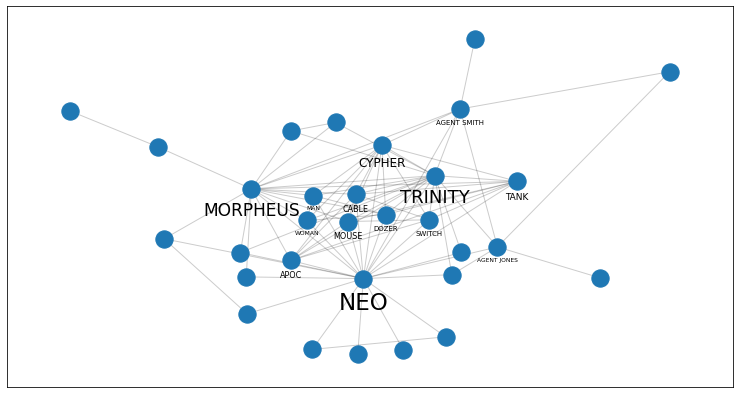

In [65]:
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx_nodes(matrixG, pos=layout)
nx.draw_networkx_edges(matrixG, pos=layout, alpha=0.2)
for params in labels_list_parameters(matrixG, layout):
    nx.draw_networkx_labels(**params)
plt.show()

### Task 7. Degree distribution (2 points)

In this task, we will try to guess a graph be its degree distribution.

__Graph A__ is described by the histogram `[0, 2, 10]` — 0 nodes with degree 0, 2 nodes with degree 1, 10 nodes with degree 2.

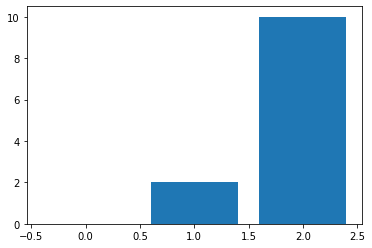

In [66]:
dens_a = [0, 2, 10]
plt.bar(range(len(dens_a)), dens_a);

In [67]:
def generate_graph_a() -> nx.Graph:
    return nx.path_graph(12)

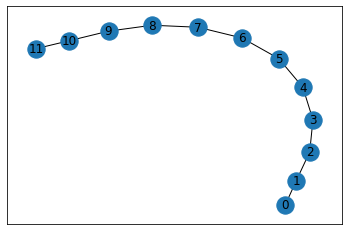

In [68]:
G = generate_graph_a()
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph B__

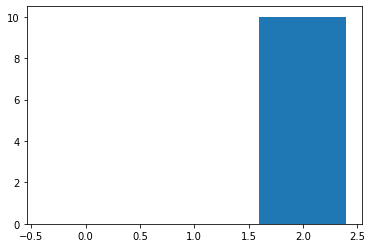

In [69]:
dens_b = [0, 0, 10]
plt.bar(range(len(dens_b)), dens_b);

In [72]:
def generate_graph_b() -> nx.Graph:
    return nx.cycle_graph(10)

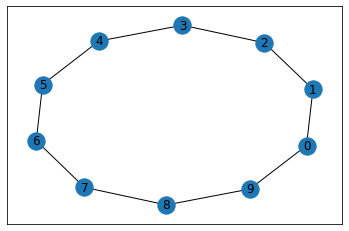

In [73]:
G = generate_graph_b()
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph C__

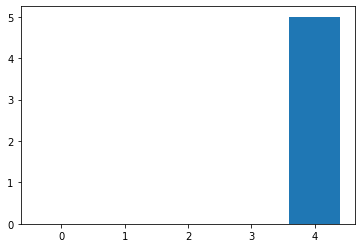

In [74]:
dens_c = [0, 0, 0, 0, 5]
plt.bar(range(len(dens_c)), dens_c);

In [75]:
def generate_graph_c() -> nx.Graph:
    return nx.complete_graph(5)

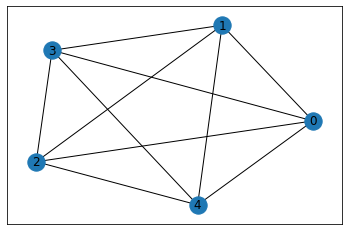

In [76]:
G = generate_graph_c()
assert nx.degree_histogram(G) == dens_c
assert nx.is_connected(G)
nx.draw_networkx(G)

__Graph D__

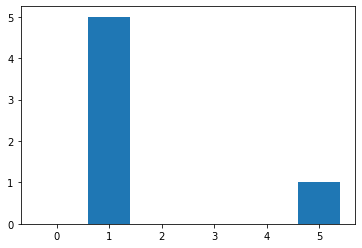

In [77]:
dens_d = [0, 5, 0, 0, 0, 1]
plt.bar(range(len(dens_d)), dens_d);

In [78]:
def generate_graph_d() -> nx.Graph:
    return nx.star_graph(5)

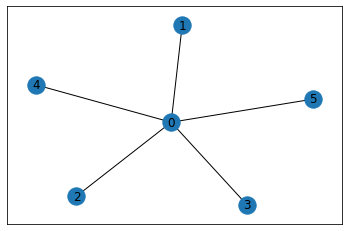

In [79]:
G = generate_graph_d()
assert nx.degree_histogram(G) == dens_d
assert nx.is_connected(G)
nx.draw_networkx(G)

### Task 8. Power law CDF (2 points)

Scale-free network has a Power law degree distribution. Let us take a closer look at this distribution. The PDF of the Power law is 

$$ p(x) = Cx^{-\alpha},$$ 

where $C$ is a normalization constant 

$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$ 

and $\alpha>1$ is called an exponent of the distribution. 

In [80]:
def power_law_pdf(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

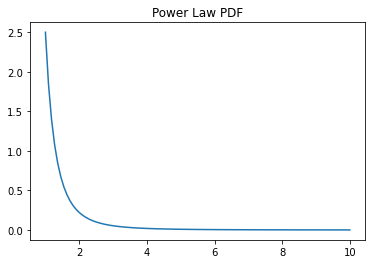

In [81]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_pdf(x_space))
plt.title('Power Law PDF');

Let us generate observations from a Power Law RV. The first step is to derive CDF of Powel law: $F(x) = P(X \leq x)$

$$F(x) = 1 - \int_{x}^\infty p(t) dt.$$

Take the integral, derive CDF analytically and then write a function `power_law_cdf` with parameters `x`, `alpha` and `x_min`.

In [84]:
def power_law_cdf(x, alpha=3.5, x_min=1):
    integral = x ** (1 - alpha) / x_min ** (1 - alpha)
    return 1 - integral

In [85]:
assert power_law_cdf(2, 2, 1) == 0.5
assert power_law_cdf(10, 2, 1) == 0.9
assert adler32(str(power_law_cdf(2, 3, 1)).encode()) == 32571595

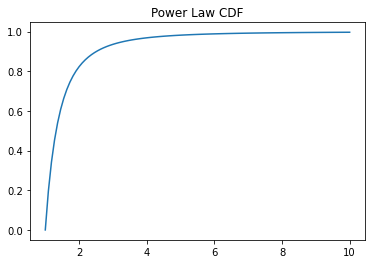

In [86]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, power_law_cdf(x_space))
plt.title('Power Law CDF');

### Task 9. Power law PPF (1 point)

Let $X \sim \text{Power law}$. Next, define a random variable $R$, s.t. $R = F(X)$, so $R$ will be uniformly distributed on interval [0, 1] ([proof](https://en.wikipedia.org/wiki/Probability_integral_transform#Proof)). Good thing here is that we easily can generate uniformly distributed pseudorandom numbers and then transform them into Power Law. Let us find an expression for $x = F^{-1}(r)$, where $r$ is an observation from uniform distrubution on interval [0, 1]. 

Find an analytical form of $F^{-1}(r)$ and write a function `power_law_ppf` (percent point function, also known as a quantile) with parameters `r`, `alpha` and `x_min`. 

In [104]:
def power_law_ppf(r, alpha=3.5, x_min=1):
    return (1 - r) ** (1 / (1 - alpha)) * x_min

In [105]:
assert round(power_law_ppf(0.5, 2, 1), 2) == 2
assert round(power_law_ppf(0.9, 2, 1), 2) == 10
assert adler32(str(round(power_law_ppf(0.96, 3, 1), 2)).encode()) == 19792020

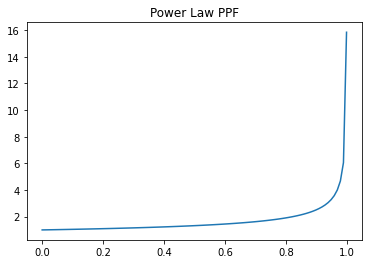

In [106]:
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, power_law_ppf(x_space))
plt.title('Power Law PPF');

Finally, we can generate observation from Power law distribution as follows:
1. Generate observation from uniform distribution on interval [0, 1]
2. Calculate PPF value of given observation

In [107]:
def power_law_generate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed)
    uni_sample = np.random.uniform(0, 0.999, n)
    return power_law_ppf(uni_sample, alpha, x_min)

Look at the histogram of the generated sample

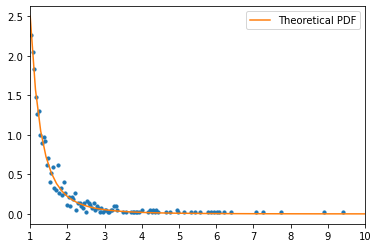

In [108]:
alpha = 3.5
x_min = 1
x_train = power_law_generate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xlim(1, 10)
plt.show()

And here is the same histogram in log-log scale

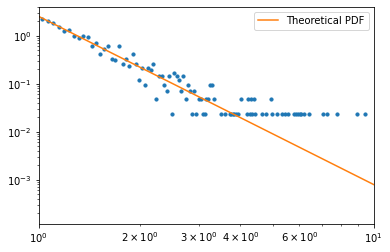

In [109]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(x_space, power_law_pdf(x_space, alpha, x_min), 
         label='Theoretical PDF', c='tab:orange')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 10)
plt.show()

### Task 10. Estimation of alpha with linear binning (2 point)

Given observations from the Power Law distribution, try to estimate $\alpha$. The easiest way is to draw an empirical PDF with linear binning in log-log scale and then apply linear regression. By _linear binning_ we mean to keep a bin width is fixed.

Write a function `alpha_lin_bins` that takes a train set, number of linear bins and returns an estimated $\alpha$.

_Hints:_
* _Take log in both side of $p(x) = Cx^{-\alpha}$_
* _To calculate an empirical PDF, use `np.histogram(x_train, bins=bins, density=True)`_
* _To calculate pseudoinverse matrix, use `np.linalg.pinv`_
* _Also you can use fit `sklearn.linear.LinearRegression`_

In [197]:
def alpha_lin_bins(x_train, bins):
    from sklearn.linear_model import LinearRegression
    hist, bin_edges = np.histogram(x_train, bins, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    hist = np.log(hist)
    bin_centers = np.log(bin_centers)

    hist_nonan = np.array([])
    bin_centers_nonan = np.array([])
    for i in range(len(hist)):
        if hist[i] != np.NINF:
          hist_nonan = np.append(hist_nonan, hist[i])
          bin_centers_nonan = np.append(bin_centers_nonan, bin_centers[i])

    reg = LinearRegression().fit(bin_centers_nonan.reshape(-1, 1), hist_nonan.reshape(-1, 1))

    return abs(reg.coef_[0][0])

In [198]:
bins = 100
x_train = power_law_generate(1000, x_min=1, alpha=2)
assert np.abs(alpha_lin_bins(x_train, bins) - 2) < 0.7
x_train = power_law_generate(1000, x_min=1, alpha=3.5)
assert np.abs(alpha_lin_bins(x_train, bins) - 3.5) < 0.9
x_train = power_law_generate(1000, x_min=1, alpha=10)
assert np.abs(alpha_lin_bins(x_train, bins) - 10) < 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


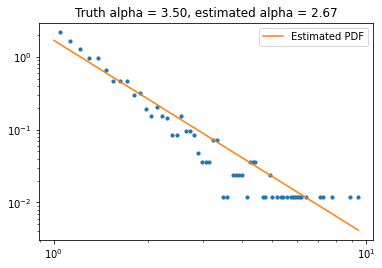

In [196]:
x_min = 1
alpha = 3.5
bins = 100

x_train = power_law_generate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alpha_lin_bins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(x_space, power_law_pdf(x_space, hat_alpha, x_min), 
         label='Estimated PDF', c='tab:orange')
plt.legend()
plt.title('Truth alpha = {:.2f}, estimated alpha = {:.2f}'.format(alpha, hat_alpha))
plt.xscale('log')
plt.yscale('log')
plt.show()